# Setup

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    '../ch_05/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
earthquakes = pd.read_csv('../ch_05/data/earthquakes.csv')

covid = pd.read_csv('../ch_05/data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']


1. Rolling 20-day minimum of Facebook closing price using pandas

In [ ]:
fb.close.rolling('20D').min().plot(
    kind = 'line', figsize=(10,5),
    style='-b', title='20 Day Minimum Closing Price of Facebook Stock'
)

2. Create a histgram and KDE of change from open to close in price of Facebook stock

In [ ]:
oc_diff = fb.open - fb.close
ax= oc_diff.plot(kind = 'hist', alpha=0.5, density='True')
oc_diff.plot(kind='kde', ax=ax, color='blue',
             title='Facebook Stock Price\'s Daily Change from Open to Close')

3. Using earthquake data, create box plots for magnitudes of each magType used in Indonesia

In [ ]:
earthquakes.query("parsed_place == 'Indonesia'")[['mag', 'magType', ]].\
    groupby('magType').boxplot(layout=(1,4), figsize=(15,3))

4. Make a line plot of the difference between maximum high price and the weekly minimum low price of Facebook.

In [ ]:
fb.resample('1W').agg(dict(high='max', low='min'))\
    .assign(weekly_max_change = lambda x : x.high - x.low)\
    .weekly_max_change.plot(kind='line', figsize=(12,5),                       
                            title='Difference between Weekly Maximum High Price\nand Weekly Minimum Low Price of Facebook Stock')

5. Plot 14-day moving average of daily change in new Covid-19 cases in Brazil, China, India, Italy, Spain and the USA.

- To set up data - use *diff( )* method to calculate day-over-day change then use *rolling( )* to get 14 day rolling average.

In [ ]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, columns=['countriesAndTerritories'], values='cases'
).apply(lambda x: x.diff().rolling('14D').mean())


- Plot graphs (Added United Kingdom)

<Axes: xlabel='date'>

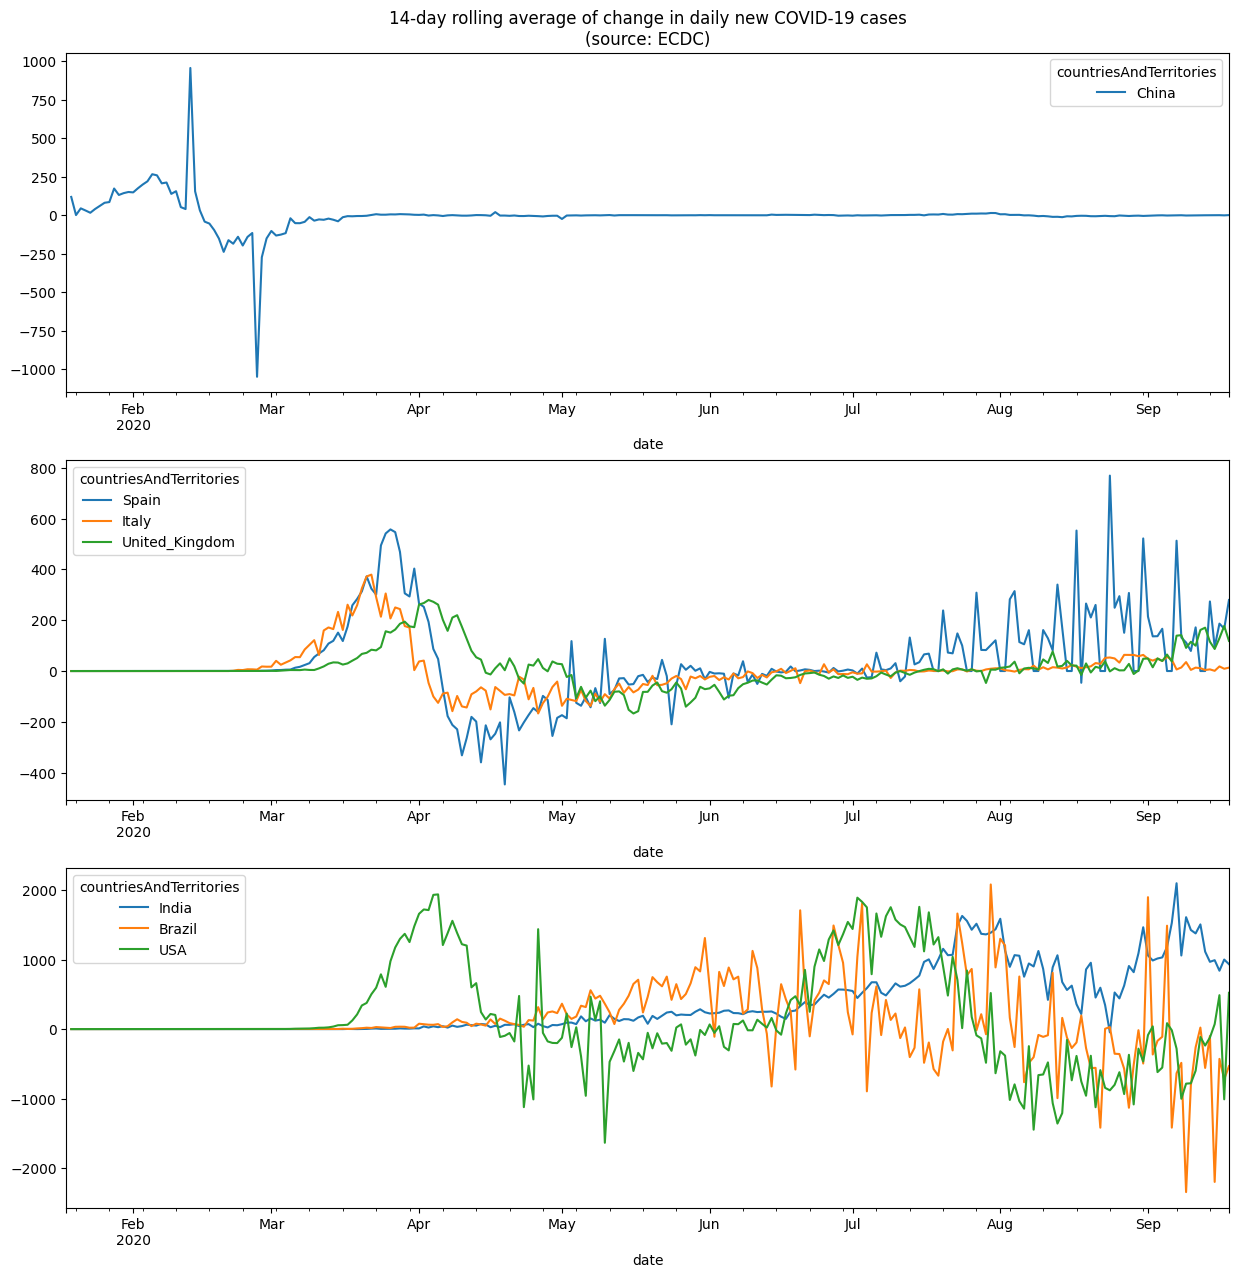

In [83]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

new_cases_rolling_average[['China']]\
    .plot(ax=axes[0],
    title='14-day rolling average of change in daily new COVID-19 cases\n(source: ECDC)')
new_cases_rolling_average[['Spain','Italy', 'United_Kingdom']]\
    .plot(ax=axes[1])
new_cases_rolling_average[['India','Brazil','USA']]\
    .plot(ax=axes[2])

6. Create 2 sub-plots side-by-side showing the effect of after-hours trading has had on Facebook stock price.

- Plot 1 - line plot of the daily difference between that day's opening price and previous day's closing price.
- Plot 2 - bar plot showing net effect this had monthly - use *resample( )*
    - Colour bars stock price gains *green* and drops *red*

<Axes: title={'center': "After hours trading\nOpen price - Previous Day's close\nMonthly Effect"}, xlabel='Months 2018'>

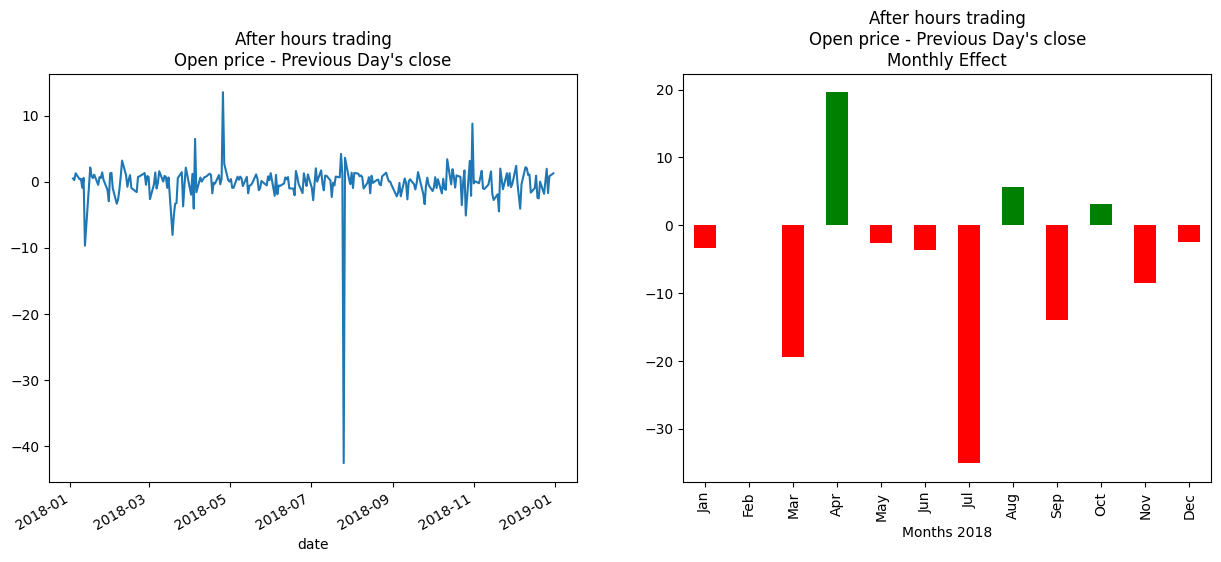

In [23]:
after_hours = fb.open - fb.close.shift()
monthly_effect = after_hours.resample('1M').sum()
monthly_effect.index = monthly_effect.index.strftime('%b')

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

after_hours.plot(
    kind='line',
    ax=axes[0],
    title='After hours trading\nOpen price - Previous Day\'s close')

monthly_effect.plot(
    kind='bar',
    ax=axes[1],
    title='After hours trading\nOpen price - Previous Day\'s close\nMonthly Effect',
    color=np.where(monthly_effect>=0,'g','r'),
    xlabel='Months 2018'
    )

